In [ ]:
공부시간에 따른 시험점수

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset = pd.read_csv('LinearRegressionData.csv')

In [3]:
dataset.head()

,hour,score
0,0.5,10
1,1.2,8
2,1.8,14
3,2.4,26
4,2.6,22


In [33]:
#독립변수와 종속변수로 분리

X = dataset.iloc[:, [0]].values
# X = dataset.iloc[:, :-1].values   #2차원 배열로 만들어야해

y = dataset.iloc[:, -1].values


In [34]:
X,y

(array([[ 0.5],
        [ 1.2],
        [ 1.8],
        [ 2.4],
        [ 2.6],
        [ 3.2],
        [ 3.9],
        [ 4.4],
        [ 4.5],
        [ 5. ],
        [ 5.3],
        [ 5.8],
        [ 6. ],
        [ 6.1],
        [ 6.2],
        [ 6.9],
        [ 7.2],
        [ 8.4],
        [ 8.6],
        [10. ]]),
 array([ 10,   8,  14,  26,  22,  30,  42,  48,  38,  58,  60,  72,  62,
         68,  72,  58,  76,  86,  90, 100], dtype=int64))

In [35]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression() #객체생성
reg.fit(X,y)    #학습(모델생성)

LinearRegression()

In [37]:
y_pred = reg.predict(X) #X에 대한 예측값
y_pred

array([  5.00336377,  12.31395163,  18.58016979,  24.84638795,
        26.93512734,  33.20134551,  40.51193337,  45.73378184,
        46.77815153,  52.        ,  55.13310908,  60.35495755,
        62.44369694,  63.48806663,  64.53243633,  71.84302419,
        74.97613327,  87.5085696 ,  89.59730899, 104.2184847 ])

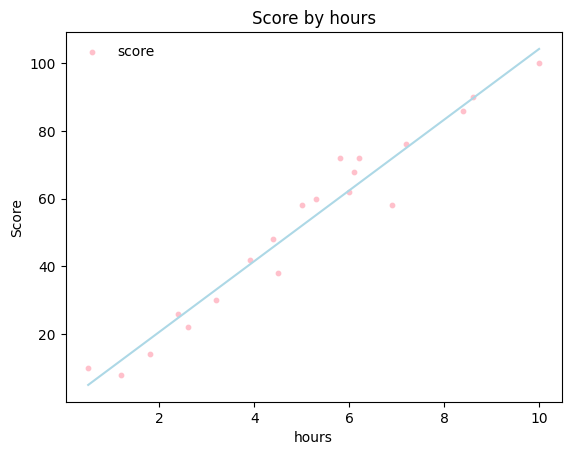

In [43]:
plt.scatter(X,y, color = 'pink', s = 10, label = 'score')    #산점도그래프

#예측된 값의 그래프
plt.plot(X, y_pred, color ='lightblue')   #선그래프
plt.title('Score by hours') #제목
plt.xlabel('hours') #X축 이름
plt.ylabel('Score') #y축 이름
plt.legend(frameon = False)
plt.show()

In [30]:
print('9시간 공부했을 때 예상점수 : ' , reg.predict([[9]]))  #[[9],[8],[7]]

9시간 공부했을 때 예상점수 :  [93.77478776 83.33109082 72.88739388]


In [31]:
reg.coef_ #기울기(m)

array([10.44369694])

In [32]:
reg.intercept_ #y절편(b)

-0.218484702867201

In [ ]:
# y = mx + b -> y = 10.4436x - 0.2184 

### 데이터세트 분리

In [44]:
import matplotlib.pyplot as plt
import pandas as pd

In [45]:
dataset = pd.read_csv('LinearRegressionData.csv')

In [46]:
#독립변수 종속변수 분리
X = dataset.iloc[:,:-1]
y = dataset.iloc[:,-1]

In [49]:
#훈련데이터 테스트데이터 분리 모듈
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [53]:
X, len(X) #20개

X_train, len(X_train)   #16개
X_test, len(X_test)   #4개

#잘 나뉘어짐! random_state값을 바꾸면 값들도 바뀔거임

(    hour
 18   8.6
 1    1.2
 19  10.0
 8    4.5,
 4)

In [56]:
y, len(y) #20개
y_train, len(y_train)
y_test, len(y_test)

(18     90
 1       8
 19    100
 8      38
 Name: score, dtype: int64,
 4)

### 분리된 데이터를 통한 모델링

In [57]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train, y_train)   # 훈련세트로 학습

LinearRegression()

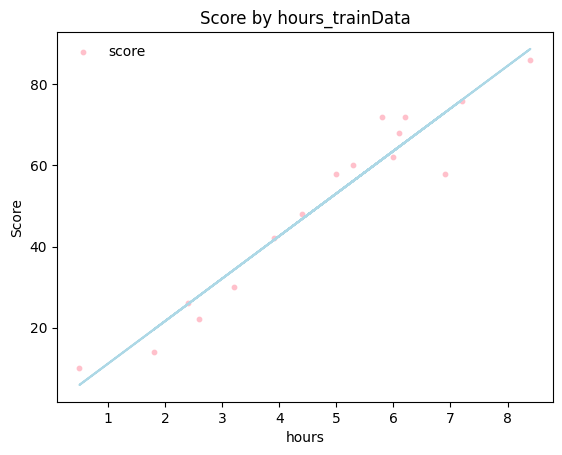

In [58]:
#훈련데이터의 시각화

plt.scatter(X_train,y_train, color = 'pink', s = 10, label = 'score')    #산점도그래프
plt.plot(X_train, reg.predict(X_train), color ='lightblue')   #선그래프
plt.title('Score by hours_trainData') 
plt.xlabel('hours') #X축 이름
plt.ylabel('Score') #y축 이름
plt.legend(frameon = False)
plt.show()

In [ ]:
# 테스트세트의 데이터 시각화

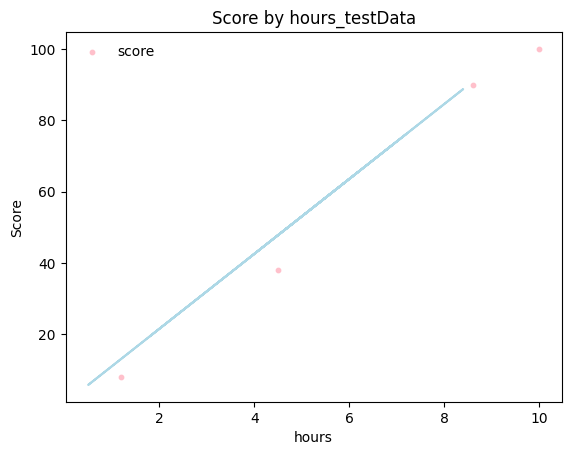

In [59]:
plt.scatter(X_test,y_test, color = 'pink', s = 10, label = 'score')    #산점도그래프
plt.plot(X_train, reg.predict(X_train), color ='lightblue')  # 얘는 그대로
plt.title('Score by hours_testData') 
plt.xlabel('hours') #X축 이름
plt.ylabel('Score') #y축 이름
plt.legend(frameon = False)
plt.show()

In [60]:
reg.coef_ #기울기(m)

array([10.49161294])

In [61]:
reg.intercept_ #y절편(b)

0.6115562905169369

### 모델평가

In [62]:
reg.score(X_test, y_test)   #테스트 세트를 통한 모델평가
#0-1까지의 값 1에 가까울수록 정확하다

0.9727616474310156

In [63]:
reg.score(X_train, y_train) # 훈련세트를 통한 모델평가

0.9356663661221668

### 경사하강법(gradient descent)

max_iter = 훈련세트 반복횟수(Epoch횟수)   
eta0 : 학습률(learning_rate)

In [98]:
from sklearn.linear_model import SGDRegressor 

#지수표기법
#1e-3 : 0.001
#1e-4 : 0.0001
#le+3 : 1000
#le+4 : 10000

#모델생성
# sr = SGDRegressor(max_iter=1000, eta0=0.001, random_state=0, verbose=1)
# sr = SGDRegressor(max_iter=1500, eta0=1e-3, random_state=0, verbose=1)
sr = SGDRegressor()
#학습
sr.fit(X_train, y_train)



SGDRegressor()

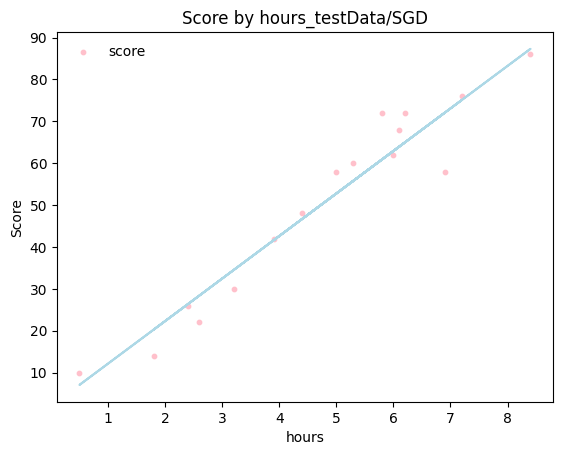

In [99]:
#시각화 훈련데이터

plt.scatter(X_train,y_train, color = 'pink', s = 10, label = 'score')    #산점도그래프
plt.plot(X_train, sr.predict(X_train), color ='lightblue')  # 얘는 그대로
plt.title('Score by hours_testData/SGD') 
plt.xlabel('hours') #X축 이름
plt.ylabel('Score') #y축 이름
plt.legend(frameon = False)
plt.show()

In [69]:
sr.coef_,sr.intercept_

(array([10.22673891]), array([1.76826748]))

In [100]:
sr.score(X_train,y_train)

0.9346039141292364

In [101]:
sr.score(X_test,y_test)

0.9745728402935994

### 다중 선형 회귀(독립변수가 여러개)
독립변수가 2개면 3차원 시각화